In [3]:
import cv2

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml

# Load MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert labels to integers
# Normalize pixel values

2024-06-28 22:17:20.541027: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 22:17:24.070348: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 22:17:29.675744: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 22:17:48.175241: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
y = y.astype('int')

In [12]:
type(y)

pandas.core.series.Series

In [7]:
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        descriptors = np.zeros((1, sift.descriptorSize()), dtype=np.float32)
    return keypoints, descriptors


In [4]:
def transform_descriptors(descriptors, max_descriptors=128):
    if len(descriptors) > max_descriptors:
        descriptors = descriptors[:max_descriptors]
    else:
        descriptors = np.pad(descriptors, ((0, max_descriptors - len(descriptors)), (0, 0)), 'constant')
    return descriptors.reshape(1, -1)

In [8]:
train_descriptors = []

for  x in X_train:
    keypoints, descriptors = extract_sift_features(x)
    transformed_descriptors = transform_descriptors(descriptors)
    train_descriptors.append(transformed_descriptors)

In [3]:
feat = np.as_array(train_descriptors)

NameError: name 'np' is not defined

## Extraction Manuelle de Feature

In [13]:
import cv2

def extract_sift_features(X):
    sift = cv2.SIFT_create()
    keypoints_list = []
    descriptors_list = []
    
    # Reshape images to 28x28
    images = X.to_numpy().reshape(-1, 28, 28).astype(np.uint8)  # SIFT works with uint8 images
    
    for img in images:
        keypoints, descriptors = sift.detectAndCompute(img, None)
        keypoints_list.append(keypoints)
        if descriptors is not None:
            descriptors_list.append(descriptors)
        else:
            # If no descriptors are found, add an array of zeros
            descriptors_list.append(np.zeros((1, sift.descriptorSize()), dtype=np.float32))
    
    # Stack descriptors and handle varying lengths
    max_descriptors = max(len(d) for d in descriptors_list)
    descriptors_padded = [np.pad(d, ((0, max_descriptors - len(d)), (0, 0)), 'constant') for d in descriptors_list]
    
    return np.array(descriptors_padded).reshape(len(X), -1)

# Extract SIFT features from the dataset
X_sift_features = extract_sift_features(X)


In [17]:
X_sift_features[56]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sift_features, y, test_size=0.2, random_state=42)

# Train the model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


In [1]:
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression






2024-06-29 05:52:09.464279: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-29 05:52:15.206807: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-29 05:52:28.898034: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-29 05:53:01.426220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Prétraitement des images: Normalisation et conversion en type float32
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [3]:
# Fonction pour extraire les descripteurs SIFT
def extract_sift_features(image):
    # Convertir l'image en CV_8U si elle n'est pas déjà en ce format
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

In [4]:
def transform_descriptors(descriptors_list):
    # Aplatir chaque descripteur en un seul vecteur
    flattened_descriptors = [d.flatten() if d is not None else np.array([]) for d in descriptors_list]
    max_length = max(len(d) for d in flattened_descriptors)
    padded_descriptors = [np.pad(d, (0, max_length - len(d)), 'constant') for d in flattened_descriptors]
    return np.array(padded_descriptors)

In [5]:
# Extraire les descripteurs pour l'ensemble d'entraînement
X_train_descriptors = [extract_sift_features(img)[1] for img in X_train]
X_test_descriptors = [extract_sift_features(img)[1] for img in X_test]

In [6]:
# Transformer les descripteurs
X_train_transformed = transform_descriptors(X_train_descriptors)
X_test_transformed = transform_descriptors(X_test_descriptors)


In [7]:
# Entraîner le modèle SVM
clf = make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(X_train_transformed, y_train)

/home/valere/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [9]:
X_train_transformed[1].shape

(3200,)

In [10]:
padded_test = [np.pad(d, (0, 3200 - len(d)), 'constant') for d in X_test_transformed]


In [11]:
padded_test[0].shape

(3200,)

In [12]:
y_pred = clf.predict(padded_test)


In [13]:
accuracy_score(y_test, y_pred)

0.7913

In [18]:
def predict_new_image(image , clf):
    _, descriptors = extract_sift_features(image)
    if descriptors is None:
        descriptors = np.zeros((1, 128))
    flat = descriptors.flatten()
    padded =np.pad(flat, (0, 3200 - len(flat)), 'constant') 
    return clf.predict([padded])

In [28]:
import matplotlib.pyplot as plt

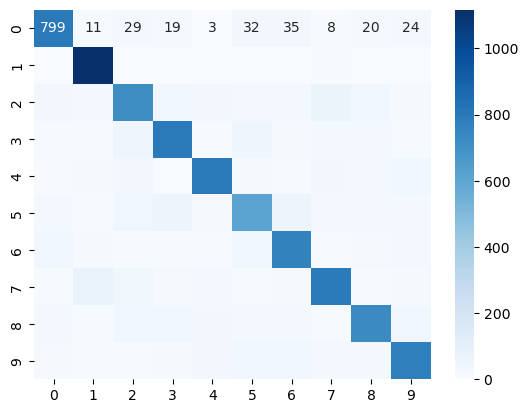

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()
plt.savefig('confusion_matrix.png')

In [26]:
import pandas as pd

In [19]:

# Charger le dataset MNIST




# Fonction pour transformer et padder les descripteurs







# Prédictions

# Fonction pipeline pour prédire une nouvelle image


# Exemple d'utilisation avec une nouvelle image
new_image = X_test[0]  # Utiliser une image de test pour l'exemple
prediction = predict_new_image(new_image,clf)
prediction


array([7], dtype=uint8)

In [20]:
y_test[0]

7

In [21]:
import joblib
joblib.dump(clf, 'logres_digit.pkl')

['logres_digit.pkl']